First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       ---------

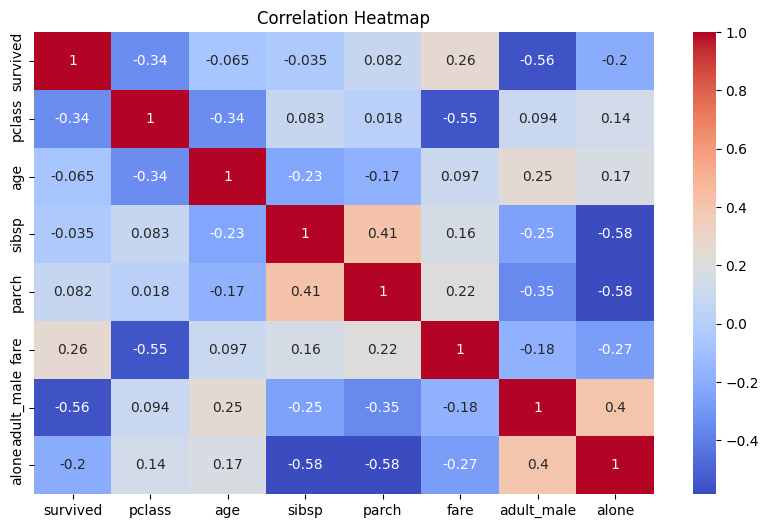

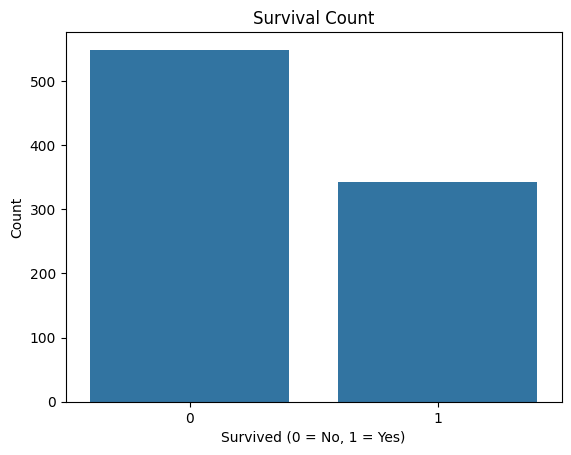

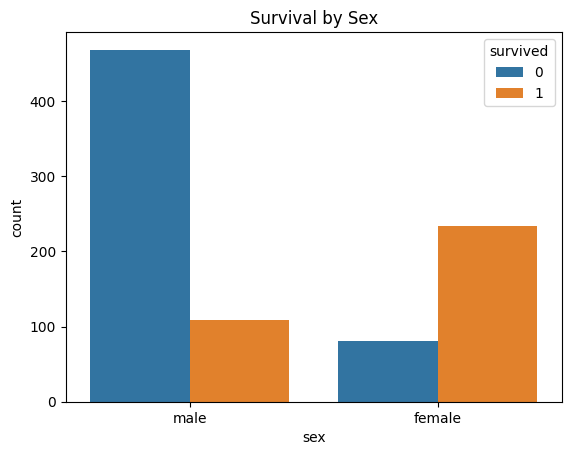

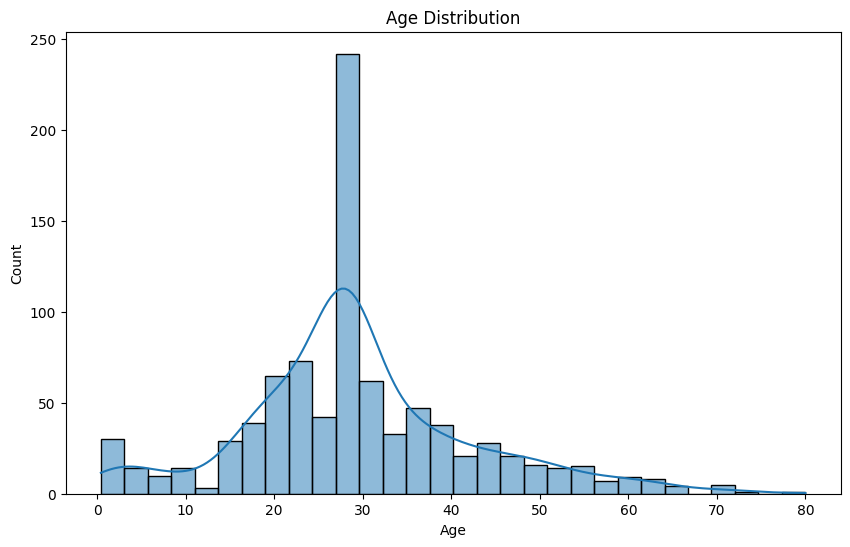

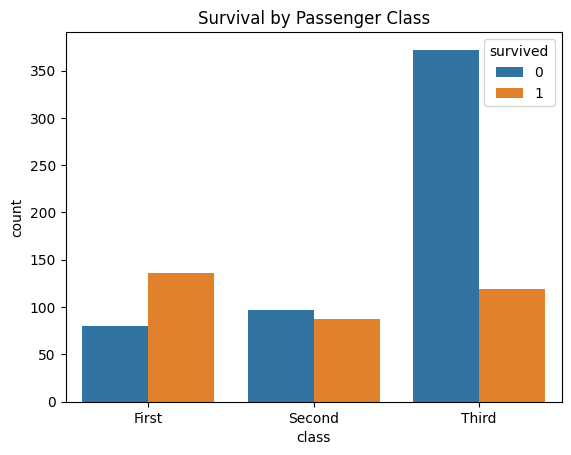

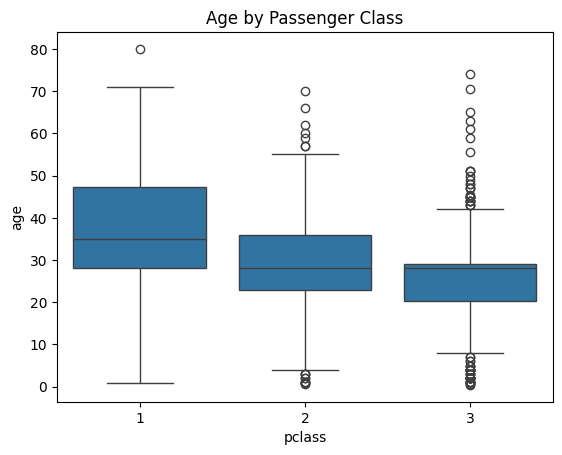

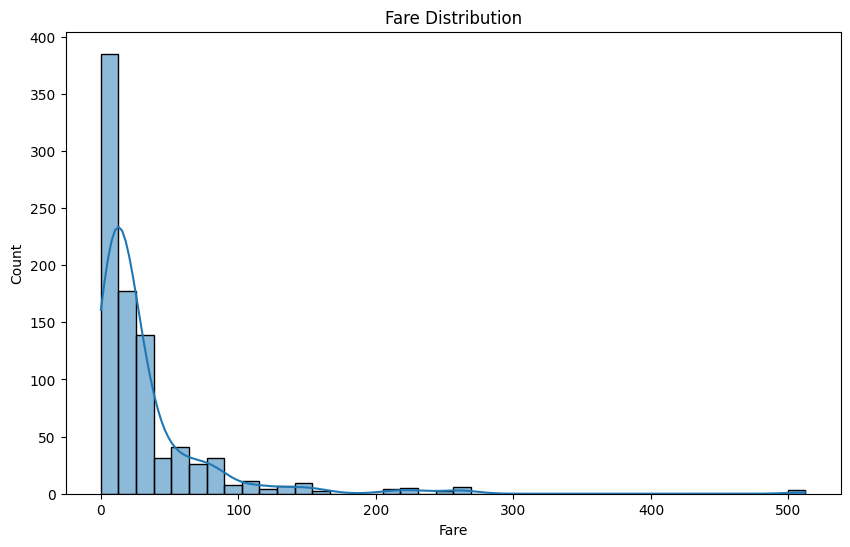

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

print("First 5 rows of the dataset:")
print(titanic.head())
print("\nDataset Info:")
print(titanic.info())

print("\nMissing values:")
print(titanic.isnull().sum())

titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic['deck'] = titanic['deck'].cat.add_categories('Unknown').fillna('Unknown')

# Drop columns that are unnecessary or duplicates
titanic.drop(['embark_town', 'alive'], axis=1, inplace=True)

# Re-check missing values
print("\nMissing values after cleaning:")
print(titanic.isnull().sum())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(titanic.describe(include='all'))

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Countplot of survivors
sns.countplot(x='survived', data=titanic)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Survival by sex
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title("Survival by Sex")
plt.show()

# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(titanic['age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

# Survival by class
sns.countplot(x='class', hue='survived', data=titanic)
plt.title("Survival by Passenger Class")
plt.show()

# Boxplot: Age vs Pclass
sns.boxplot(x='pclass', y='age', data=titanic)
plt.title("Age by Passenger Class")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(titanic['fare'], bins=40, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.show()

titanic.to_csv("cleaned_titanic.csv", index=False)